# ISYE 6501 HW Week 7
### Question 10.1
***Using the same crime data set uscrime.txt as in Questions 8.2 and 9.1, find the best model you can using: ***
* a regression tree model
* a random forest model

***In R, you can use the tree package or the rpart package, and the randomForest package. For
each model, describe one or two qualitative takeaways you get from analyzing the results***

#### 10.1 Part 1: Regression Tree model
In part one of this question I am going to build a regression tree model using the rpart package and the uscrime data set from the past few weeks. In the code blocks below I start with basic project set up, and a quick few of the data.

In [81]:
# Basic Project set up
rm(list = ls())
setwd('/Users/wwaite/Dev/gtech/ISYE 6501/Week 7')

suppressWarnings(library(rpart))
suppressWarnings(library(randomForest))
suppressWarnings(library(ggplot2))
suppressWarnings(library(dplyr))
suppressWarnings(library(repr))

In [82]:
# Read the data and get a quick view of the structure
uscrime <- tbl_df(read.table("uscrime.txt", stringsAsFactors = FALSE, header = TRUE))

# Get a view of the data
str(uscrime)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635

In the step below I am going to find the best model I can using a regression tree model implemented with rpart. A tree can help you to explore the stucture of a set of data, while developing easy to visualize decision rules for predicting a categorical regression outcome for each factor. In the code below I first implemented rpart to grow the tree using the method anova for a regression tree, a control minsplit of 3 for the minimum number of data points (we are recommended to use a minimum of 5% of the data per factor), and cp = 0.001 for the threshold decrease in variance.

In [83]:
set.seed(1)

# Grow the tree
tree_model <- rpart(Crime~., data = uscrime, method = "anova")

In this next section I am going to examine the results of the model. First I printed the cross validated results of the tree model. In the output you can see the variables that rpart as identified as important for splitting, and under that you can see the coefficient outputs for each split. You can see from the output that the only 3 variables used from entire crime data set are NW, Po1, and Pop. After using printcp, I then got a summary of the tree, wher eyou can see a more detailed explanation of each split. The output is pretty verbose, so after that I will then visualize the tree for a simpler look at the results.

In [84]:
printcp(tree_model)


Regression tree:
rpart(formula = Crime ~ ., data = uscrime, method = "anova")

Variables actually used in tree construction:
[1] NW  Po1 Pop

Root node error: 6880928/47 = 146403

n= 47 

        CP nsplit rel error xerror    xstd
1 0.362963      0   1.00000 1.0597 0.25895
2 0.148143      1   0.63704 1.0241 0.22270
3 0.051732      2   0.48889 1.1606 0.24169
4 0.010000      3   0.43716 1.0585 0.23467


In [85]:
# detailed summary of splits
summary(tree_model)

Call:
rpart(formula = Crime ~ ., data = uscrime, method = "anova")
  n= 47 

          CP nsplit rel error   xerror      xstd
1 0.36296293      0 1.0000000 1.059739 0.2589546
2 0.14814320      1 0.6370371 1.024087 0.2227001
3 0.05173165      2 0.4888939 1.160607 0.2416903
4 0.01000000      3 0.4371622 1.058472 0.2346708

Variable importance
   Po1    Po2 Wealth   Ineq   Prob      M     NW    Pop   Time     Ed     LF 
    17     17     11     11     10     10      9      5      4      4      1 
    So 
     1 

Node number 1: 47 observations,    complexity param=0.3629629
  mean=905.0851, MSE=146402.7 
  left son=2 (23 obs) right son=3 (24 obs)
  Primary splits:
      Po1    < 7.65      to the left,  improve=0.3629629, (0 missing)
      Po2    < 7.2       to the left,  improve=0.3629629, (0 missing)
      Prob   < 0.0418485 to the right, improve=0.3217700, (0 missing)
      NW     < 7.65      to the left,  improve=0.2356621, (0 missing)
      Wealth < 6240      to the left,  improve=0.2

Below you can see a visualization of some of the key parts of the rpart summary. The R Squared value of each split is identified on the left plot, and the xerror is displayed on the right. You can see that xerror seems to go up and down for each of the splits, will the R Squared value seems to increase with each split, while beginning to taper off as it reaches the 3rd split.


Regression tree:
rpart(formula = Crime ~ ., data = uscrime, method = "anova")

Variables actually used in tree construction:
[1] NW  Po1 Pop

Root node error: 6880928/47 = 146403

n= 47 

        CP nsplit rel error xerror    xstd
1 0.362963      0   1.00000 1.0597 0.25895
2 0.148143      1   0.63704 1.0241 0.22270
3 0.051732      2   0.48889 1.1606 0.24169
4 0.010000      3   0.43716 1.0585 0.23467


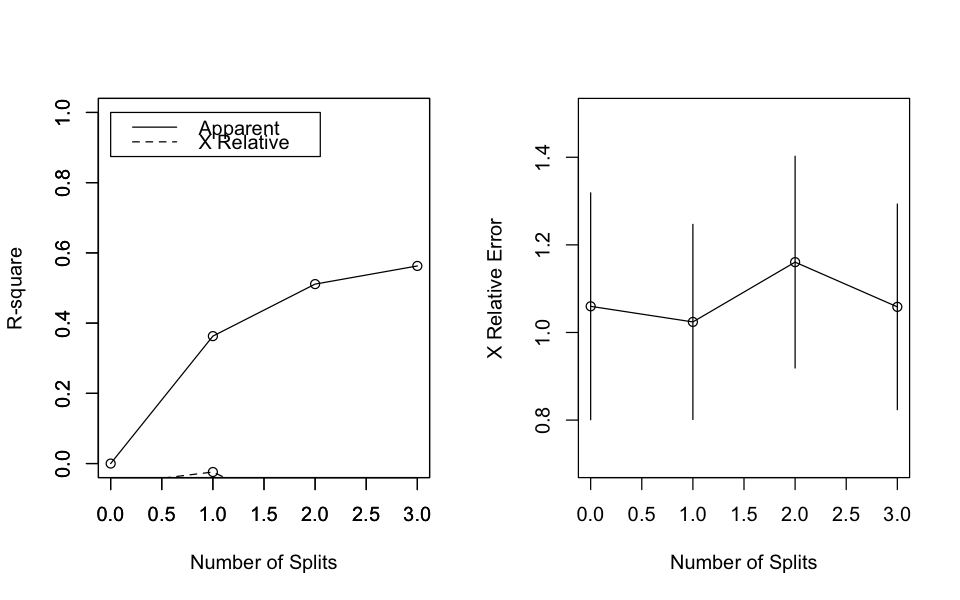

In [86]:
# plot two plots on one page 
par(mfrow=c(1,2))

# visualize cross-validation results
options(repr.plot.height = 5, repr.plot.width = 8)
rsq.rpart(tree_model)


Next I am going to plot the actual tree to visualize each of the splits. You can see again that only 3 variables are used to decided each split, with Po1, Pop, and NW each being used only one time.

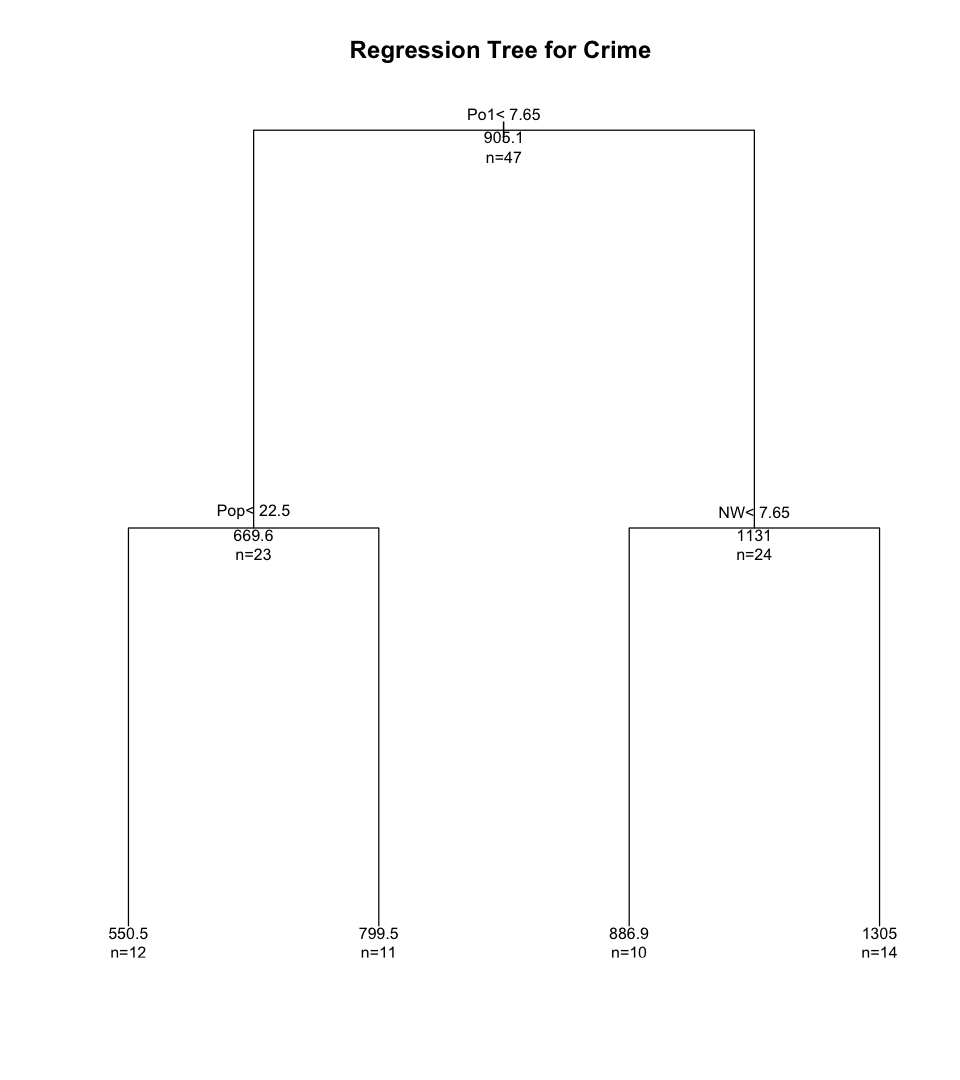

In [87]:
# plot tree 
options(repr.plot.height = 9)
plot(tree_model, uniform=TRUE, 
   main="Regression Tree for Crime ")
text(tree_model, use.n=TRUE, all=TRUE, cex=.8)


Below I am going to do a quick manual calculation to find the final rsquared value for the entire model. You can see that the RSquared output is about 0.56 which is considerably lower than the models we used in previous weeks. Despite the lower RSquared, this could actually be a more effective solution if there are distinct groups within the data. If there are distinct groups, then the other models may run a higher risk of becoming overfit by generalizing a model to all groups.

In [88]:
yhat <- predict(tree_model)
SSres <- sum((yhat - uscrime$Crime)^2)
SStot <- sum((uscrime$Crime - mean(uscrime$Crime))^2)
R2 <- 1 - SSres / SStot
R2

[1] 0.5628378

Next, I am going to prune back the tree to avoid overfitting the data. Typically, you will want to select a tree size that minimizes the cross-validated error, the xerror column printed by printcp( ). Specifically, use printcp( ) to examine the cross-validated error results, select the complexity parameter associated with minimum error, and place it into the prune( ) function which I have done in the code block below.

In [89]:
# automatically select the complexity parameter associated with the smallest cross-validated error. 
min_error <- tree_model$cptable[which.min(tree_model$cptable[,"xerror"]),"CP"]
min_error

[1] 0.1481432

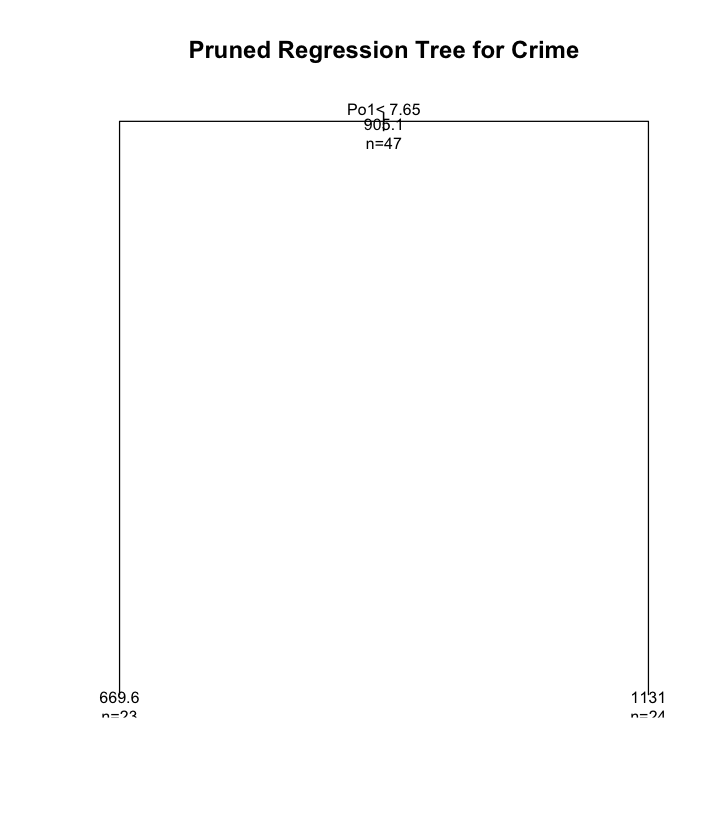

In [90]:
# prune the tree 
pruned_tree<- prune(tree_model, cp=min_error) # from cptable   

# plot the pruned tree 
options(repr.plot.height = 7, repr.plot.width = 6)
plot(pruned_tree, uniform=TRUE, 
   main="Pruned Regression Tree for Crime")
text(pruned_tree, use.n=TRUE, all=TRUE, cex=.8)

In [91]:
yhat <- predict(pruned_tree)
SSres <- sum((yhat - uscrime$Crime)^2)
SStot <- sum((uscrime$Crime - mean(uscrime$Crime))^2)
R2 <- 1 - SSres / SStot
R2

[1] 0.3629629

After pruning the tree, the model only found one split using the Po1 variable. I then tested the RSquared above and it looks like pruning the tree reduced this value considerably. I would recommend going with the original model found in this case, as it appears that pruning is unnecessary. 

In [92]:
# Load the test value
test_value <- data.frame(M = 14.0,
                        So = 0,
                        Ed = 10.0,
                        Po1 = 12.0,
                        Po2 = 15.5,
                        LF = 0.640,
                        M.F = 94.0,
                        Pop = 150,
                        NW = 1.1,
                        U1 = 0.120,
                        U2 = 3.6,
                        Wealth = 3200,
                        Ineq = 20.1,
                        Prob = 0.040,
                        Time = 39.0)

predict(tree_model, test_value)
predict(pruned_tree, test_value)

1 
886.9

1 
1130.75

The optimal number of splits found with the original tree was 3 splits which as a final RSquared value of about 56%. The prediction it output was 886.9. I then pruned the tree to account for overfitting using the xerror and the optimal number of splits that the model found was 1. With 1 split the RSquared was 36% and the predicted value was 1130.75 for the test data point. Based off of this output the original tree model appears to be less accurate than the traditional linear regression model, however it could prove to be much more useful when evaluating a larger data set because it automatically identifies the most useful components of a data set which could help reduce the effort in building the model and complexity. Additionally the original regression model may be over fit so this could be the most appropriate model selection.

#### 10.1 Part 2: Random Forest Model
Random forests improve predictive accuracy by generating a large number of bootstrapped trees (based on random samples of variables), classifying a case using each tree in this new "forest", and deciding a final predicted outcome by combining the results across all of the trees (an average in regression, a majority vote in classification). Breiman and Cutler's random forest approach is implimented via the randomForest package. In the first step below, I executed randomForest on the crime data set, and then printed some high level results out. I used a prediction number of 4 which is calculated by n/3 with n being the number of predictors in the data set. The % Variance explained is similar to the RSquared value, which you can see was 41.72%.

In [93]:
set.seed(1)

# Random Forest prediction of Crime data
fit_forest <- randomForest(Crime ~ ., data = uscrime, mtry = 4, ntree = 500)

# view fit results 
print(fit_forest)


Call:
 randomForest(formula = Crime ~ ., data = uscrime, mtry = 4, ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 85324.85
                    % Var explained: 41.72


In [94]:
# Manually calculate the RSquared for confirmation of % var explained above
yhat <- predict(fit_forest)
SSres <- sum((yhat - uscrime$Crime)^2)
SStot <- sum((uscrime$Crime - mean(uscrime$Crime))^2)
R2 <- 1 - SSres / SStot
R2

[1] 0.4171908

This plot shows the Error and the Number of Trees. You can see that the error drops considerably in the first number of trees produced, and then increases a little bit before maintaining a consistent error level.

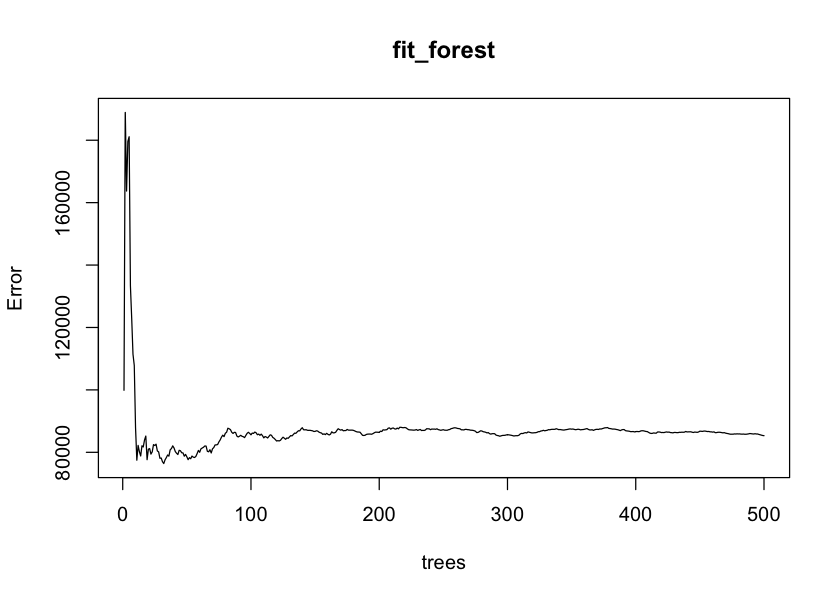

In [95]:
options(repr.plot.height = 5, repr.plot.width = 7)
plot(fit_forest)

In [96]:
# Use the Random Forest to predict crime on the test value
predict(fit_forest, test_value)

1 
1206.158

### Question 10.2
***Describe a situation or problem from your job, everyday life, current events, etc., for which a logistic regression model would be appropriate. List some (up to 5) predictors that you might use. ***

A situation from my job where I have implemented a logistic regression model is to predict whether or not students in our courses will graduate or drop out. For context, we are an EdTech company similar to EDX or Coursera, and we are semester based delivering online programs. I used the model to find a probability of a binary event, graduation or drop out. We used the model throughout the semester, using the probability of a drop out as a leading indicator for us to take corrective action on such as calling participants to get back on track with their course work. Predictors I used for the model are outlined below:

* ***Days to register after communication:*** After a company selects an employee for a program of ours, we then reach out to a contact asking them to register. The number of days between our communication with them and an actual registration can signal liklihood to drop out based on their relative level of eagerness
* ***Course Registration:*** Specifically, how many days before the course start date did a student register. Our hypothesis is that students who register last minute, or after a course starts are less engaged with the course, and more likely to drop out
* ***Date of First Login:*** When did a student first login after registering in days. We also hypothesized that this shows more eagerness and enthusiasm for the coursework
* ***Length of Time between activities:*** The number of days between activities. While different students have different learning and studying habits, if we see students with large gaps in between learning activities like viewing lectures, gaps as large as 2 weeks, they are considerably less likely to graduate
* ***Seniority:*** We offer courses to enterprises only, so each student has a job title that they submit with a seniority. More senior contacts at the level of Vice President and above have less time to commit, so they are less likely to graduate

### Question 10.3

* ***Using the GermanCredit data set germancredit.txt, use logistic regression to find a good predictive model for whether credit applicants are good credit risks or not. Show your model (factors used and their coefficients), the software output, and the quality of fit. You can use the glm function in R. To get a logistic regression (logit) model on data where the response is either zero or one, use family=binomial(link=”logit”) in your glm function call.***
* ***Because the model gives a result between 0 and 1, it requires setting a threshold probability to
separate between “good” and “bad” answers. In this data set, they estimate that incorrectly
identifying a bad customer as good, is 5 times worse than incorrectly classifying a good
customer as bad. Determine a good threshold probability based on your model.***

In this problem I am going to build a logistic regression model and use that to predict whether credit applicants are good credit risks or not. Specifically, this model outputs the probability of a binary event. In the first code blocks below, I first loaded the data and saw that the response V21 had values of 1 and 2, which I then recoded into 0 and 1 which is necessary for logistic regression to work

In [97]:
library(boot)

# Read the data and get a quick view of the structure
german_credit <- tbl_df(read.table("germancredit.txt", sep = " ", stringsAsFactors = FALSE, header = FALSE))

# Get a view of the data
head(german_credit)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,2
A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,1


In [98]:
# Recode V21 for use in logistic regression
german_credit$V21[german_credit$V21 == 1] <- 0
german_credit$V21[german_credit$V21 == 2] <- 1
head(german_credit)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,0
A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,1
A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,0
A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,0
A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,1
A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,0


Logistic regression is useful when you are predicting a binary outcome from a set of continuous predictor variables. In this next step I fit the model with V21 as a response, and the remainder of the data as predictors. I also used the binomial family. In the first few steps, I just wanted to get the Coefficient output for each variable so that I can build an additional, less complex model based on the p-values. So in this step, and the step I used to find the appropriate threshold, I did not use training or test data.

In [99]:
set.seed(1)
german_fit <- glm(V21 ~ ., data = german_credit, family = binomial(link = "logit"))
summary(german_fit)


Call:
glm(formula = V21 ~ ., family = binomial(link = "logit"), data = german_credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3410  -0.6994  -0.3752   0.7095   2.6116  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.005e-01  1.084e+00   0.369 0.711869    
V1A12       -3.749e-01  2.179e-01  -1.720 0.085400 .  
V1A13       -9.657e-01  3.692e-01  -2.616 0.008905 ** 
V1A14       -1.712e+00  2.322e-01  -7.373 1.66e-13 ***
V2           2.786e-02  9.296e-03   2.997 0.002724 ** 
V3A31        1.434e-01  5.489e-01   0.261 0.793921    
V3A32       -5.861e-01  4.305e-01  -1.362 0.173348    
V3A33       -8.532e-01  4.717e-01  -1.809 0.070470 .  
V3A34       -1.436e+00  4.399e-01  -3.264 0.001099 ** 
V4A41       -1.666e+00  3.743e-01  -4.452 8.51e-06 ***
V4A410      -1.489e+00  7.764e-01  -1.918 0.055163 .  
V4A42       -7.916e-01  2.610e-01  -3.033 0.002421 ** 
V4A43       -8.916e-01  2.471e-01  -3.609 0.000308 ***
V4A44       -5

Classifying someone with bad credit as having good credit is 5 times worse than incorrectly classifying someone with good credit. So to come up with an appropriate threshold to use for this model we need to to use confusion matrixes to minimize the # of false positives over false negatives. In the loop below, I iteratively tested probability threshold values from 0.1 to 1.0 and you can see the output beneath the code as 0.62

In [100]:
# Get predicted values from the model
predictions <- predict(german_fit, type="response")

# Store the predictions
predictions_df <- german_credit
predictions_df['predictions'] <- predictions

In [101]:
# Function to iteratively test threshold values
threshold_test <- function(df) {
    
    # Loop 0.00 to 100.00
    for (threshold in seq(0.1, 1, by=.01)) {

        # Create a threshold test _df
        test_df <- df %>%
        select(V21, predictions)
        
        # Create a threshold predictions column based on the threshold iterator
        test_df <- test_df %>%
        mutate(threshold_predictions = ifelse(predictions < threshold, 0, 1))
        
        # Store table of results
        results <- table(test_df$V21, test_df$threshold_predictions)
        
        # Calculation of mis-labeled results 
        # (multiply by 5 for mislabeled bad credit)
        bad_credit_misses <- table(test_df$V21, 
                                   test_df$threshold_predictions)[3] * 5
        good_credit_misses <- table(test_df$V21, 
                                    test_df$threshold_predictions)[2]
        
        # Conditional to store final threshold
        if (good_credit_misses > bad_credit_misses) {
            return(threshold)
        }
    }
}
threshold_result <- threshold_test(predictions_df)
threshold_result


[1] 0.62

I then used the original model and the threshold to output a final confusion matrix of results, and you can see the predictive value was about 78%.

In [102]:
# Use the threshold value above to output a final prediction
predictions_df <- predictions_df %>% 
mutate(threshold_predictions = ifelse(predictions < threshold_result, 0, 1))

confuse_matrix <- table(predictions_df$V21, predictions_df$threshold_predictions)
confuse_matrix

   
      0   1
  0 666  34
  1 182 118

In [103]:
# Total prediction accuracy using all predictors and a threshold of 0.62
sum(confuse_matrix[1] + confuse_matrix[4]) / nrow(predictions_df)

[1] 0.784

After finding the appropriate threshold value for the model, I am now going to build an additional model using variable significance output from the first model. I am going to take the standard P value significane of less than 0.05. Additionally, I am going to do a simple training and test data set split to validate the model most effectively.

In [107]:
set.seed(1)
train <- sample(1:nrow(german_credit), 700)   # random sampling
test <- (1:nrow(german_credit))[-train] 

germancredit_model2 = glm(V21 ~ V1 + 
                                V2 + 
                                V3 + 
                                V4 + 
                                V5 + 
                                V6 +  
                                V8 + 
                                V9 + 
                                V10 + 
                                V14 + 
                                V20,
                          family = binomial(link = "logit"),
                          data = german_credit,
                          subset = train)

predictions <- predict(germancredit_model2, newdata = german_credit[test,])

dim(german_credit[test,])
length(predictions)

[1] 300  21

[1] 300

In [105]:
# Store the predictions
predictions_df <- german_credit[test, ]
predictions_df['predictions'] <- predictions

# Use the threshold value above to output a final prediction
predictions_df <- predictions_df %>% 
mutate(threshold_predictions = ifelse(predictions < threshold_result, 0, 1))

confuse_matrix <- table(predictions_df$V21, predictions_df$threshold_predictions)
confuse_matrix

   
      0   1
  0 194  11
  1  74  21

In [106]:
# Total prediction accuracy using all predictors and a threshold of 0.62
sum(confuse_matrix[1] + confuse_matrix[4]) / nrow(predictions_df)

[1] 0.7166667

The final predictive value for the logistic model on the test data was 71.6%. While this was 7% lower than the original model with all of the predictors, this model has less complexity with fewer predictors and additionally is evaluated on data that it wasn't trained with. So we can trust the output from this model more.